# EEG Statistics

### FaceWord experiment
Using some of the FaceWord data you collected, we are going to go through a couple of different ways to discern whether the difference in signal between your conditions is statistically significant. You can go through the notebook using your FaceWord data or the data from your own experiment, that's up to you :-)

## Epochs
We need epochs for the statistical tests, so you can insert your preprocessed data from earlier tutorials under this section. I'll read in some epochs from your FaceWord which I prepared earlier and I'll be looking at the words/images contrast.

(Tip: You can save the epochs object you created in your preprocessing notebook by using epochs.save('your_epochs-epo.fif'))

(Extra tip: You can run terminal commands from cells using the os.system() function or simply writing an exclamation mark before the command)

In [ ]:
import os

In [ ]:
# importing modules
#import os
import pip
!python -m pip install mne
#os.system('python -m pip install scikit-learn')
import numpy as np
import pandas as pd
import mne


from scipy import stats as st
import statistics as stats

In [ ]:
epochs = mne.read_epochs('epoch_data/EPOCHS_wICA-epo.fif')
epochs

epochs_n400 = mne.read_epochs('epoch_Data/EPOCHS_wICA_n400-epo.fif')
epochs_n400

### making Epochs for -0.2 - 0.4 data

In [95]:
## EVOKED EPOCHS - general for task and prime
## first we take the epochs based on the trigger, and then we take the avererage of those to get the evoked
prime_epochs = epochs['Prime']
task_epochs = epochs['Task']

## PRIME EPOCHS Sorting the color and spatial primes from one another.
prime_colour_epochs = epochs['Prime/cblue', 'Prime/cred']
prime_spatial_epochs = epochs['Prime/sleft', 'Prime/sright']
prime_no_epochs = epochs['Prime/no_prime']

# TASK EPOCHS SPATIAL + colour PRIMING
task_spatial_epochs = epochs['Task/sleft', 'Task/sright']
task_colour_epochs = epochs['Task/cred', 'Task/cblue']
task_noprime_epochs = epochs['Task/no_prime/left', 'Task/no_prime/right']
task_bothprime_epochs = epochs['Task/sleft', 'Task/sright', 'Task/cred', 'Task/cblue']

# WAITING EPOCHS - the waiting time between task + prime
wait_col_prime_epochs = epochs['Wait/cblue', 'Wait/cred']
wait_spa_prime_epochs = epochs['Wait/sleft', 'Wait/sright']
wait_no_prime_epochs = epochs['Wait/no_prime/left', 'Wait/no_prime/right']
# THE RESPOND !!!! 
correct_noprime_epochs = epochs['Correct/no_prime/left_task', 'Correct/no_prime/right_task']
correct_epochs = epochs['Correct/left_task', 'Correct/right_task']


all_epochs = epochs['Task/sleft', 'Task/sright', 'Task/cred', 'Task/cblue','Task/no_prime/left', 'Task/no_prime/right']

### making epochs for -0.2 - 0.7 (n400) data

In [94]:
## EVOKED EPOCHS - general for task and prime
## first we take the epochs based on the trigger, and then we take the avererage of those to get the evoked
n_prime_epochs = epochs_n400['Prime']
n_task_epochs = epochs_n400['Task']

## PRIME EPOCHS Sorting the color and spatial primes from one another.
n_prime_colour_epochs = epochs_n400['Prime/cblue', 'Prime/cred']
n_prime_spatial_epochs = epochs_n400['Prime/sleft', 'Prime/sright']
n_prime_no_epochs = epochs_n400['Prime/no_prime']

# TASK EPOCHS SPATIAL + colour PRIMING
n_task_spatial_epochs = epochs_n400['Task/sleft', 'Task/sright']
n_task_colour_epochs = epochs_n400['Task/cred', 'Task/cblue']
n_task_noprime_epochs = epochs_n400['Task/no_prime/left', 'Task/no_prime/right']
n_task_bothprime_epochs = epochs_n400['Task/sleft', 'Task/sright', 'Task/cred', 'Task/cblue']

# WAITING EPOCHS - the waiting time between task + prime
n_wait_col_prime_epochs = epochs_n400['Wait/cblue', 'Wait/cred']
n_wait_spa_prime_epochs = epochs_n400['Wait/sleft', 'Wait/sright']
vwait_no_prime_epochs = epochs_n400['Wait/no_prime/left', 'Wait/no_prime/right']
# THE RESPOND !!!! 
n_correct_noprime_epochs = epochs_n400['Correct/no_prime/left_task', 'Correct/no_prime/right_task']
n_correct_epochs = epochs_n400['Correct/left_task', 'Correct/right_task']


all_epochs_n400 = epochs_n400['Task/sleft', 'Task/sright', 'Task/cred', 'Task/cblue','Task/no_prime/left', 'Task/no_prime/right']

## Windowed mean
for this part we should choose which difference we wan't to inspect - the task/prime, col/spatial prime etc.

One of the simplest way in which we can determine whether the signal in our two conditions are statistically significant is by:

1) Segmenting our data using only certain channels in a specific time window. Keep in mind that which time window and channels should be established a priori, for instance according to the literature. 
2) Taking the mean of that window across channels and and samples.
3) Running statistical tests on the windowed means from the two conditions.

In an experiment with multiple participants we would also average over trials from individual participants, in order to only have one data point per participant (and thereby avoid multiple comparisons). However, since we have one participant, we can keep one dimension of the individual data, i.e. the trials.

### THE DATA MADE
Investigating the resulting data; how many dimensions does the data have? What do you think they represent (i.e. which dimension is channels, trials, etc.)?

*FIRST DIMENSTION*
- this is believe is the number of good events 

*SECOND DIMENSTION*
- this is the number of picks - so the number of channels we include in the data 

*THIRD DIMENSION* 
- this is the amount of **numerical values of the signal (in microvolts)** that are in the window we set with tmin and tmax. So in this exact window of time, there are 25 signals for each . It is an array of tiny numbers 




# T-test
We can now do a t-test on the trials from the two conditions, to establish whether the means of the two groups are statistically significant.

We can use the get_data() function to get the numerical values of the signal (in microvolts) for the t-test. tmin and tmax are used to define the size of the window, and the picks are the channels that we expect to see an effect in.

#### P 100 !!!!!!!!!

In [100]:
##### first make data to use for TTEST AND CSV
colp_100_data = task_colour_epochs.get_data(picks=['O1', 'Oz', 'O2'], tmin=.1, tmax=.12)
spap_100_data = task_spatial_epochs.get_data(picks=['O1', 'Oz', 'O2'], tmin=.1, tmax=.12)
nop_100_data = task_noprime_epochs.get_data(picks=['O1', 'Oz', 'O2'], tmin=.1, tmax=.12)
p_100_data = task_bothprime_epochs.get_data(picks=['O1', 'Oz', 'O2'], tmin=.1, tmax=.12)

all_100_data = all_epochs.get_data(picks=['O1', 'Oz', 'O2'], tmin=.09, tmax=.12)
small_100_data = all_epochs.get_data(picks=['O1', 'Oz', 'O2'], tmin=.09, tmax=.1)

### AVERAGING OVER THE DIMENSIONS
col_100_mean = np.mean(colp_100_data, axis=2) # averaging over the third dimension of the data
col_100_mean = np.mean(col_100_mean, axis=1) # averaging over the second dimension of the data

spap_100_mean = np.mean(spap_100_data, axis=2)
spap_100_mean = np.mean(spap_100_mean, axis=1)

np_100_mean = np.mean(nop_100_data, axis = 2)
np_100_mean = np.mean(np_100_mean, axis = 1)

p_100_mean = np.mean(p_100_data, axis = 2)
p_100_mean = np.mean(p_100_mean, axis = 1)

### MAKING THE TEST:

##### colour vs. spatial prime
st.ttest_ind(a=spap_100_mean, b=col_100_mean)



Ttest_indResult(statistic=-0.5103912838935369, pvalue=0.6112187645120957)

In [ ]:
#### no prime vs. prime 
st.ttest_ind(a=p_100_mean, b=np_100_mean)

In [ ]:
#### spatial vs. np 
st.ttest_ind(a=spap_100_mean, b=np_100_mean)

In [ ]:
#### colour vs. np 
st.ttest_ind(a=col_100_mean, b=np_100_mean)

#### p100 anova

In [ ]:
st.f_oneway(spap_100_mean, col_100_mean, np_100_mean)

### LATENCY TEST p100

In [78]:
n = col_100_mean.max()
print(colp_100_data)


[[[-1.31590443e-06 -1.18089676e-06 -2.62847029e-06 -4.56716123e-06
   -5.81846370e-06 -5.75031708e-06 -4.33437460e-06]
  [-2.82931873e-06 -2.99225671e-06 -4.60072813e-06 -7.12915945e-06
   -9.38766766e-06 -1.02477637e-05 -9.14633579e-06]
  [-1.51356755e-06 -1.87822409e-06 -3.71783286e-06 -6.52057580e-06
   -9.19848330e-06 -1.03982764e-05 -9.37074597e-06]]

 [[-3.33865433e-06 -3.81214528e-06 -5.28403951e-06 -6.94517886e-06
   -7.51501950e-06 -6.21815643e-06 -3.25494698e-06]
  [-1.90577142e-06 -1.91604598e-06 -1.92162937e-06 -1.95190663e-06
   -1.47848971e-06  8.44417697e-08  2.84503080e-06]
  [ 5.88523880e-06  5.59515692e-06  5.12760242e-06  4.77763104e-06
    4.81868017e-06  5.45362681e-06  6.73833211e-06]]

 [[ 7.38616711e-07  3.56530077e-06  5.42205897e-06  5.14196552e-06
    3.17261443e-06  1.06439467e-06  2.42897526e-07]
  [-3.55978705e-06  1.91179336e-07  2.90351495e-06  3.03624897e-06
    1.15201057e-06 -9.28061686e-07 -1.43379695e-06]
  [-1.49422042e-06  2.95926097e-06  7.327845

In [ ]:

smax100 = spap_100_mean.max()
npmax100 = np_100_mean.max()

### P200 TIME 

In [ ]:
##### first make data to use for TTEST AND CSV
colp_200_data = task_colour_epochs.get_data(picks=['CP1', 'CP2', 'Cz'], tmin=.125, tmax=.275)
spap_200_data = task_spatial_epochs.get_data(picks=['CP1', 'CP2', 'Cz'], tmin=.125, tmax=.275)
nop_200_data = task_noprime_epochs.get_data(picks=['CP1', 'CP2', 'Cz'], tmin=.125, tmax=.275)
p_200_data = task_bothprime_epochs.get_data(picks=['CP1', 'CP2', 'Cz'], tmin=.125, tmax=.275)


### AVERAGING OVER THE DIMENSIONS
col_200_mean = np.mean(colp_200_data, axis=2) # averaging over the third dimension of the data
col_200_mean = np.mean(col_200_mean, axis=1) # averaging over the second dimension of the data

spap_200_mean = np.mean(spap_200_data, axis=2)
spap_200_mean = np.mean(spap_200_mean, axis=1)

np_200_mean = np.mean(nop_200_data, axis = 2)
np_200_mean = np.mean(np_200_mean, axis = 1)

p_200_mean = np.mean(p_200_data, axis = 2)
p_200_mean = np.mean(p_200_mean, axis = 1)


#### p200 ttest

In [ ]:

##### colour vs. spatial prime
st.ttest_ind(a=spap_200_mean, b=col_200_mean)


In [ ]:

#### no prime vs. prime 
st.ttest_ind(a=p_200_mean, b=np_200_mean)


In [ ]:

#### spatial vs. np 
st.ttest_ind(a=spap_200_mean, b=np_200_mean)


In [ ]:

#### colour vs. np 
st.ttest_ind(a=col_200_mean, b=np_200_mean)

### p200 anova

In [ ]:
st.f_oneway(spap_200_mean, col_200_mean, np_200_mean)

#### n170


In [91]:
##### first make data to use for TTEST AND CSV
colp_170_data = task_colour_epochs.get_data(picks=['O1', 'O2'], tmin=.14, tmax=.18)
spap_170_data = task_spatial_epochs.get_data(picks=['O1', 'O2'], tmin=.14, tmax=.18)
nop_170_data = task_noprime_epochs.get_data(picks=['O1', 'O2'], tmin=.14, tmax=.18)
p_170_data = task_bothprime_epochs.get_data(picks=['O1', 'O2'], tmin=.14, tmax=.18)


### AVERAGING OVER THE DIMENSIONS
col_170_mean = np.mean(colp_170_data, axis=2) # averaging over the third dimension of the data
col_170_mean = np.mean(col_170_mean, axis=1) # averaging over the second dimension of the data

spap_170_mean = np.mean(spap_170_data, axis=2)
spap_170_mean = np.mean(spap_170_mean, axis=1)

np_170_mean = np.mean(nop_170_data, axis = 2)
np_170_mean = np.mean(np_170_mean, axis = 1)

p_170_mean = np.mean(p_170_data, axis = 2)
p_170_mean = np.mean(p_170_mean, axis = 1)


### n170 TTEST

In [ ]:
##### colour vs. spatial prime
st.ttest_ind(a=spap_170_mean, b=col_170_mean)


In [ ]:

#### no prime vs. prime 
st.ttest_ind(a=p_170_mean, b=np_170_mean)

In [ ]:
#### spatial vs. np 
st.ttest_ind(a=spap_170_mean, b=np_170_mean)

In [ ]:

#### colour vs. np 
st.ttest_ind(a=col_170_mean, b=np_170_mean)

### n170 anova

In [92]:
st.f_oneway(spap_170_mean, col_170_mean, np_170_mean)

F_onewayResult(statistic=0.24735434999829592, pvalue=0.7812712504128722)

## N400 

In [ ]:
##### first make data to use for TTEST AND CSV
colp_400_data = n_task_colour_epochs.get_data(picks=['FC1', 'FC2', 'Fz'], tmin=.3, tmax=.6)
spap_400_data = n_task_spatial_epochs.get_data(picks=['FC1', 'FC2', 'Fz'],tmin=.3, tmax=.6)
nop_400_data = n_task_noprime_epochs.get_data(picks=['FC1', 'FC2', 'Fz'], tmin=.3, tmax=.6)
p_400_data = n_task_bothprime_epochs.get_data(picks=['FC1', 'FC2', 'Fz'], tmin=.3, tmax=.6)


### AVERAGING OVER THE DIMENSIONS
col_400_mean = np.mean(colp_400_data, axis=2) # averaging over the third dimension of the data
col_400_mean = np.mean(col_400_mean, axis=1) # averaging over the second dimension of the data

spap_400_mean = np.mean(spap_400_data, axis=2)
spap_400_mean = np.mean(spap_400_mean, axis=1)

np_400_mean = np.mean(nop_400_data, axis = 2)
np_400_mean = np.mean(np_400_mean, axis = 1)

p_400_mean = np.mean(p_400_data, axis = 2)
p_400_mean = np.mean(p_400_mean, axis = 1)


### N400 TTEST

In [ ]:
##### colour vs. spatial prime
st.ttest_ind(a=spap_400_mean, b=col_400_mean)


In [ ]:
#### no prime vs. prime '
st.ttest_ind(a=p_400_mean, b=np_400_mean)


In [ ]:
#### spatial vs. np 
st.ttest_ind(a=spap_400_mean, b=np_400_mean)


In [ ]:

#### colour vs. np 
st.ttest_ind(a=col_400_mean, b=np_400_mean)

### N400 ANOVA

In [ ]:
st.f_oneway(spap_400_mean, col_400_mean, np_400_mean)

# Mixed effects model
By averaging over multiple dimensions of our data, we are of couse throwing away some information. If we had multiple participants, we could add the trials back into the mix by using a mixed-effects model. Since we already have trials, we could add the samples or channels as random effects in a mixed-effects model.

We can export the data in a csv format so you have the option of doing a bit of modelling in R if you would like to ;-)

# P100 DATA 

In [ ]:
##### PRIME DATA 
shape = p_100_data.shape 
index = pd.MultiIndex.from_product([range(s)for s in shape])
prime = pd.DataFrame({'signal': p_100_data.flatten()}, index=index).reset_index()
prime.to_csv('General100Prime.csv', index=False)

##### NO PRIME DATA 
shape = nop_100_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
noprime = pd.DataFrame({'signal': nop_100_data.flatten()}, index=index).reset_index()
noprime.to_csv('No100Prime.csv', index=False)

##### COL PRIME DATA 
shape = colp_100_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
colprime = pd.DataFrame({'signal': colp_100_data.flatten()}, index=index).reset_index()
colprime.to_csv('Col100Prime.csv', index=False)

##### SPA PRIME DATA
shape = spap_100_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
colprime = pd.DataFrame({'signal': spap_100_data.flatten()}, index=index).reset_index()
colprime.to_csv('Spa100Prime.csv', index=False)

# P200 DATA


In [ ]:
##### PRIME DATA 
shape = p_200_data.shape 
index = pd.MultiIndex.from_product([range(s)for s in shape])
prime = pd.DataFrame({'signal': p_200_data.flatten()}, index=index).reset_index()
prime.to_csv('General200Prime.csv', index=False)

##### NO PRIME DATA 
shape = nop_200_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
noprime = pd.DataFrame({'signal': nop_200_data.flatten()}, index=index).reset_index()
noprime.to_csv('No200Prime.csv', index=False)

##### COL PRIME DATA 
shape = colp_200_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
colprime = pd.DataFrame({'signal': colp_200_data.flatten()}, index=index).reset_index()
colprime.to_csv('Col200Prime.csv', index=False)

##### SPA PRIME DATA
shape = spap_200_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
colprime = pd.DataFrame({'signal': spap_200_data.flatten()}, index=index).reset_index()
colprime.to_csv('Spa200Prime.csv', index=False)

# N170 DATA

In [ ]:
##### PRIME DATA 
shape = p_170_data.shape 
index = pd.MultiIndex.from_product([range(s)for s in shape])
prime = pd.DataFrame({'signal': p_170_data.flatten()}, index=index).reset_index()
prime.to_csv('General170Prime.csv', index=False)

##### NO PRIME DATA 
shape = nop_170_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
noprime = pd.DataFrame({'signal': nop_170_data.flatten()}, index=index).reset_index()
noprime.to_csv('No170Prime.csv', index=False)

##### COL PRIME DATA 
shape = colp_170_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
colprime = pd.DataFrame({'signal': colp_170_data.flatten()}, index=index).reset_index()
colprime.to_csv('Col170Prime.csv', index=False)

##### SPA PRIME DATA
shape = spap_170_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
colprime = pd.DataFrame({'signal': spap_170_data.flatten()}, index=index).reset_index()
colprime.to_csv('Spa170Prime.csv', index=False)

# N400 DATA

In [ ]:
##### PRIME DATA 
shape = p_400_data.shape 
index = pd.MultiIndex.from_product([range(s)for s in shape])
prime = pd.DataFrame({'signal': p_400_data.flatten()}, index=index).reset_index()
prime.to_csv('General400Prime.csv', index=False)

##### NO PRIME DATA 
shape = nop_400_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
noprime = pd.DataFrame({'signal': nop_400_data.flatten()}, index=index).reset_index()
noprime.to_csv('No400Prime.csv', index=False)

##### COL PRIME DATA 
shape = colp_400_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
colprime = pd.DataFrame({'signal': colp_400_data.flatten()}, index=index).reset_index()
colprime.to_csv('Col400Prime.csv', index=False)

##### SPA PRIME DATA
shape = spap_400_data.shape
index = pd.MultiIndex.from_product([range(s)for s in shape])
colprime = pd.DataFrame({'signal': spap_400_data.flatten()}, index=index).reset_index()
colprime.to_csv('Spa400Prime.csv', index=False)

## Permutation test
The null hypothesis (H0) is that the data in the two conditions comes from the same probability distribution (i.e. they are interchangeable). In order to test this we scramble the data in the conditions n amount of times to get an idea of what distributions of cluster sizes we would expect if there is no difference between conditions. Based on this distribution we can establish how large a cluster should be to cross our significance level (e.g. 0.05) and then compare this to the clusters based on our conditions. If the highest value from our clusters is larger, this suggests that the data in the conditions are not interchangeable (i.e. the difference between them is significant).

'Task/cblue', 'Task/cred'

### trying with new data made for this :)

In [ ]:
epochs_per = mne.read_epochs('epoch_Data/EPOCHS_permutation-epo.fif')

In [50]:

# getting the data from our conditions
X = [epochs_per[k].get_data() for k in ['Task/no_prime', 'Task/spatial', 'Task/colour']]
print(X[0].shape)

# transposing
X = [np.transpose(x, (0, 2, 1)) for x in X]
print(X[0].shape)

(40, 30, 225)
(40, 225, 30)


Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 30


Text(0.5, 1.0, 'Between-sensor adjacency')

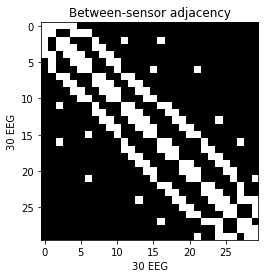

In [51]:
import matplotlib.pyplot as plt

# finding channel adjacency: informs us which channels are next to each other (for co-localisation)
adjacency, ch_names = mne.channels.find_ch_adjacency(epochs.info, ch_type='eeg')

# plotting between-sensor adjacency
plt.imshow(adjacency.toarray(), cmap='gray',
           interpolation='nearest')
plt.xlabel('{} EEG'.format(len(ch_names)))
plt.ylabel('{} EEG'.format(len(ch_names)))
plt.title('Between-sensor adjacency')

In [85]:
# set family-wise p-value
p_accept = 0.2

# running the permutation test with 2000 permutations and a random seed of 4
cluster_stats = mne.stats.spatio_temporal_cluster_test(X, n_permutations=1000, tail=0,
                                             n_jobs=-1, buffer_size=None, adjacency=adjacency, seed=4)

# selecting clusters with significant p-values
T_obs, clusters, p_values, _ = cluster_stats
good_cluster_inds = np.where(p_values < p_accept)[0]

Using a threshold of 3.115366
stat_fun(H1): min=0.000593 max=9.038202
Running initial clustering
Found 55 clusters
Permuting 999 times...


/var/folders/k4/ms5x119d5cd2s9ldsk71bkf00000gn/T/ipykernel_84646/525589162.py:5: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  cluster_stats = mne.stats.spatio_temporal_cluster_test(X, n_permutations=1000, tail=0,
100%|██████████|  : 999/999 [00:11<00:00,   87.31it/s]

Computing cluster p-values
Done.


In [86]:
print(p_values)
print(good_cluster_inds)

[1.    1.    1.    0.976 1.    1.    1.    1.    1.    1.    1.    1.
 1.    1.    1.    1.    1.    1.    1.    1.    0.999 1.    0.641 0.997
 1.    1.    1.    0.139 1.    1.    0.999 1.    0.999 1.    1.    0.997
 1.    0.704 1.    1.    0.364 0.187 1.    1.    0.42  1.    1.    0.209
 1.    1.    1.    1.    0.998 1.    1.   ]
[27 41]


The code for this plot is a bit long and complex but you don't have to go through it all, just swap in your conditions in the first couple of lines :-)

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


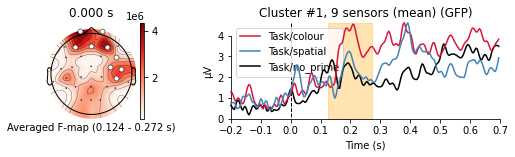

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


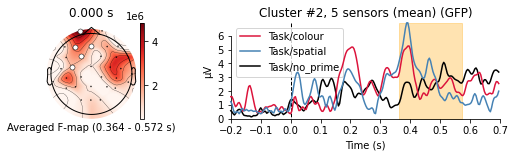

In [88]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# configuration of variables for visualisation
colors = {'Task/colour': "crimson", 'Task/spatial': 'steelblue', 'Task/no_prime':'black' }

# organising data for plotting
evokeds = {cond: epochs_per[cond].average() for cond in ['Task/no_prime', 'Task/colour', 'Task/spatial']} 

# looping over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpacking cluster information
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)

    # topography for F stat
    f_map = T_obs[time_inds, ...].mean(axis=0)

    # getting signals at the sensors contributing to the cluster
    sig_times = epochs_n400.times[time_inds]

    # creating spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True

    # initialising the figure
    fig, ax_topo = plt.subplots(1, 1, figsize=(10, 3))

    # plotting average test statistic and mark significant sensors
    f_evoked = mne.EvokedArray(f_map[:, np.newaxis], epochs.info, tmin=0)
    f_evoked.plot_topomap(times=0, mask=mask, axes=ax_topo, cmap='Reds',
                          vmin=np.min, vmax=np.max, show=False,
                          colorbar=False, mask_params=dict(markersize=10))
    image = ax_topo.images[0]

    # creating additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # adding axes for colourbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    plt.colorbar(image, cax=ax_colorbar)
    ax_topo.set_xlabel(
        'Averaged F-map ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]]))

    # adding new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)
    title = 'Cluster #{0}, {1} sensor'.format(i_clu + 1, len(ch_inds))
    if len(ch_inds) > 1:
        title += "s (mean)"
    mne.viz.plot_compare_evokeds(evokeds, title=title, picks=ch_inds, axes=ax_signals,
                         colors=colors, show=False,
                         split_legend=True, truncate_yaxis='auto')

    # plotting temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    ax_signals.fill_betweenx((ymin, ymax), sig_times[0], sig_times[-1],
                             color='orange', alpha=0.3)

    # clean-up
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=0.5)
    plt.show()